In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings
demo = pd.read_csv("Concrete_Data_Yeh.csv")
demo.head()

cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  csMPa  
0          676.0   28  79.99  
1          676.0   28  61.89  
2          594.0  270  40.27  
3          594.0  365  41.05  
4          825.5  360  44.30

In [3]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


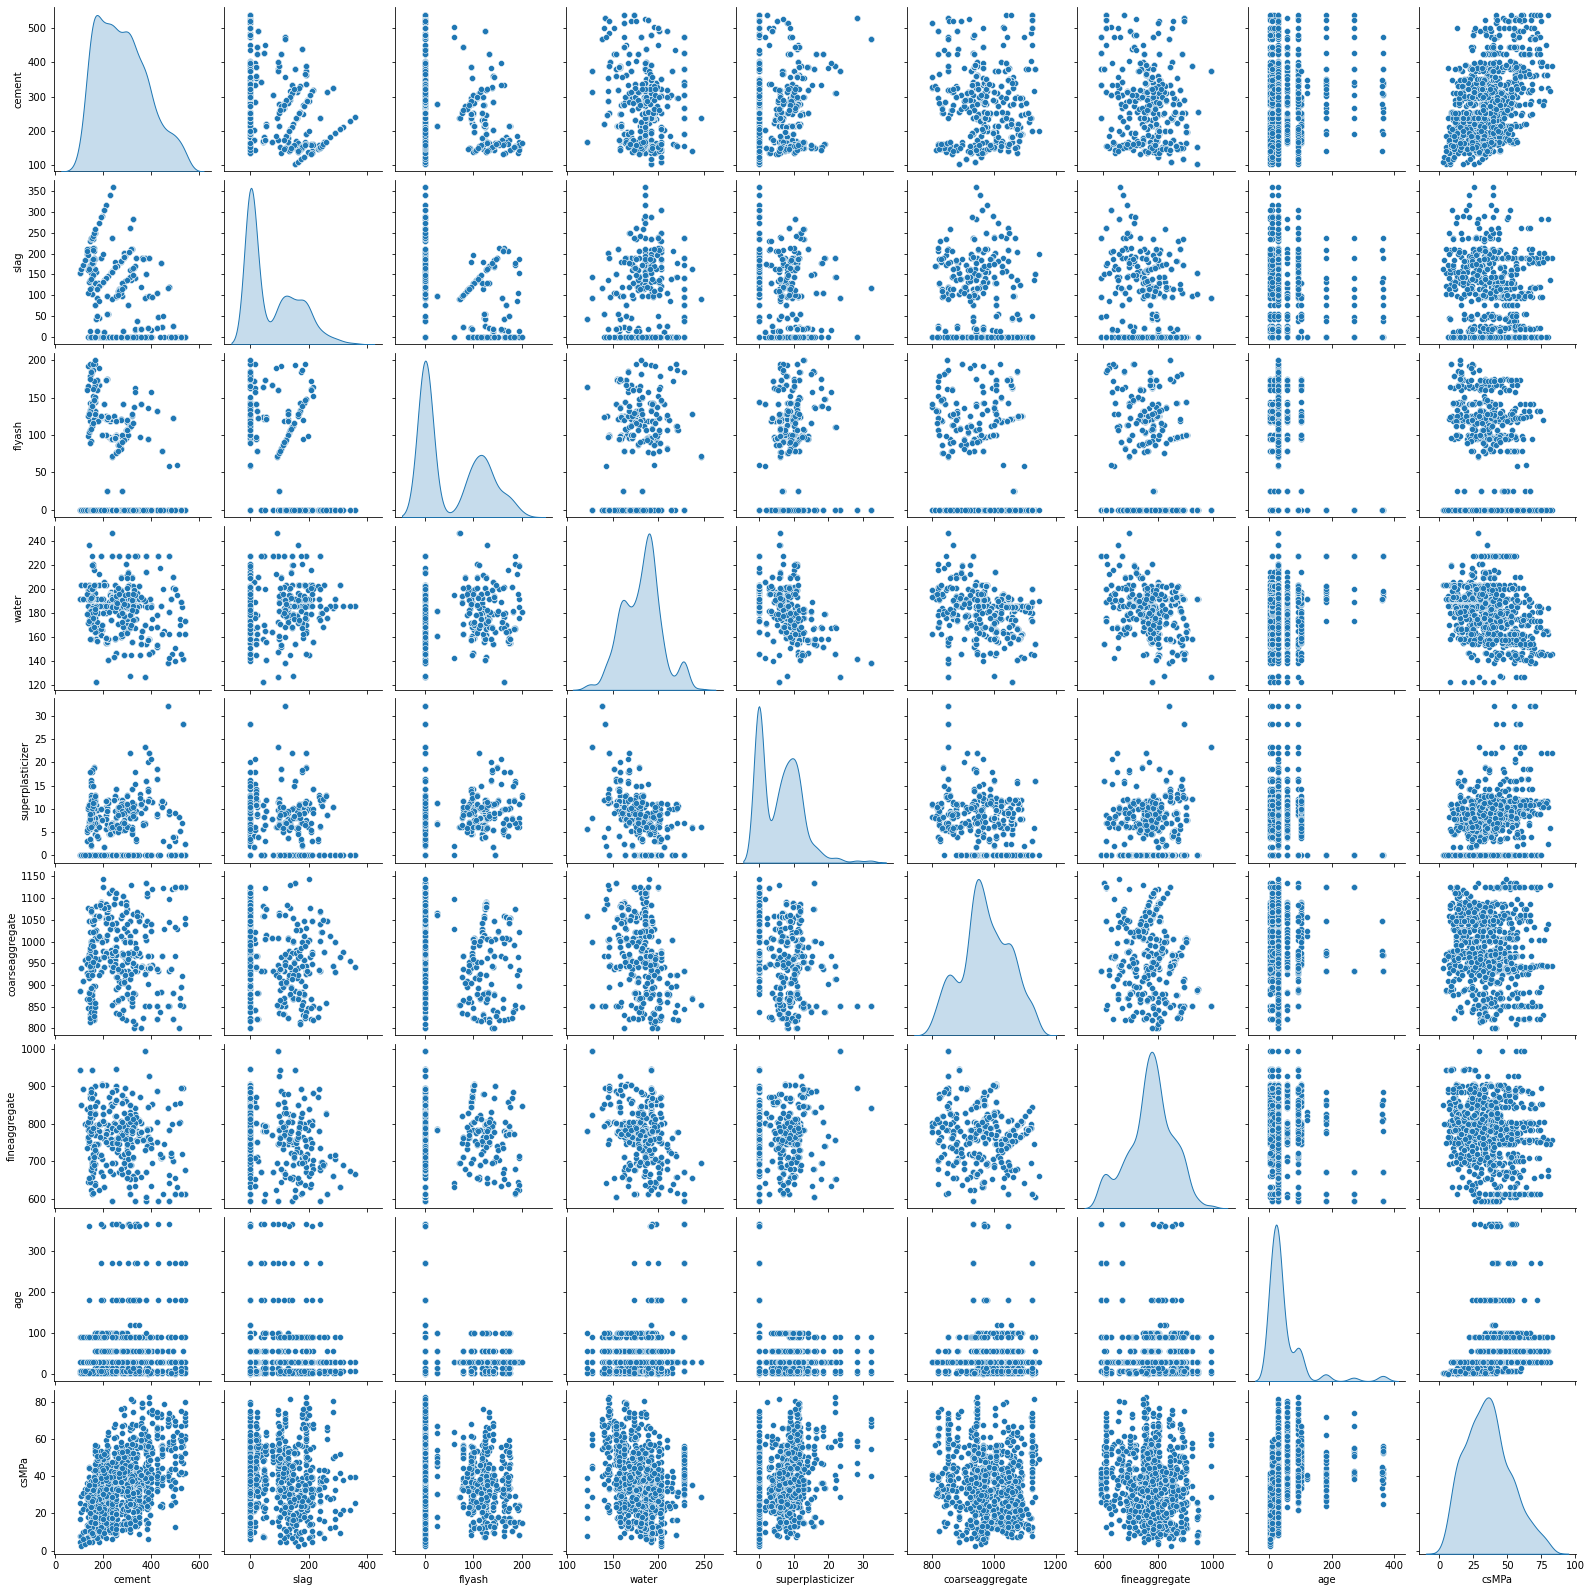

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(demo,diag_kind='kde')

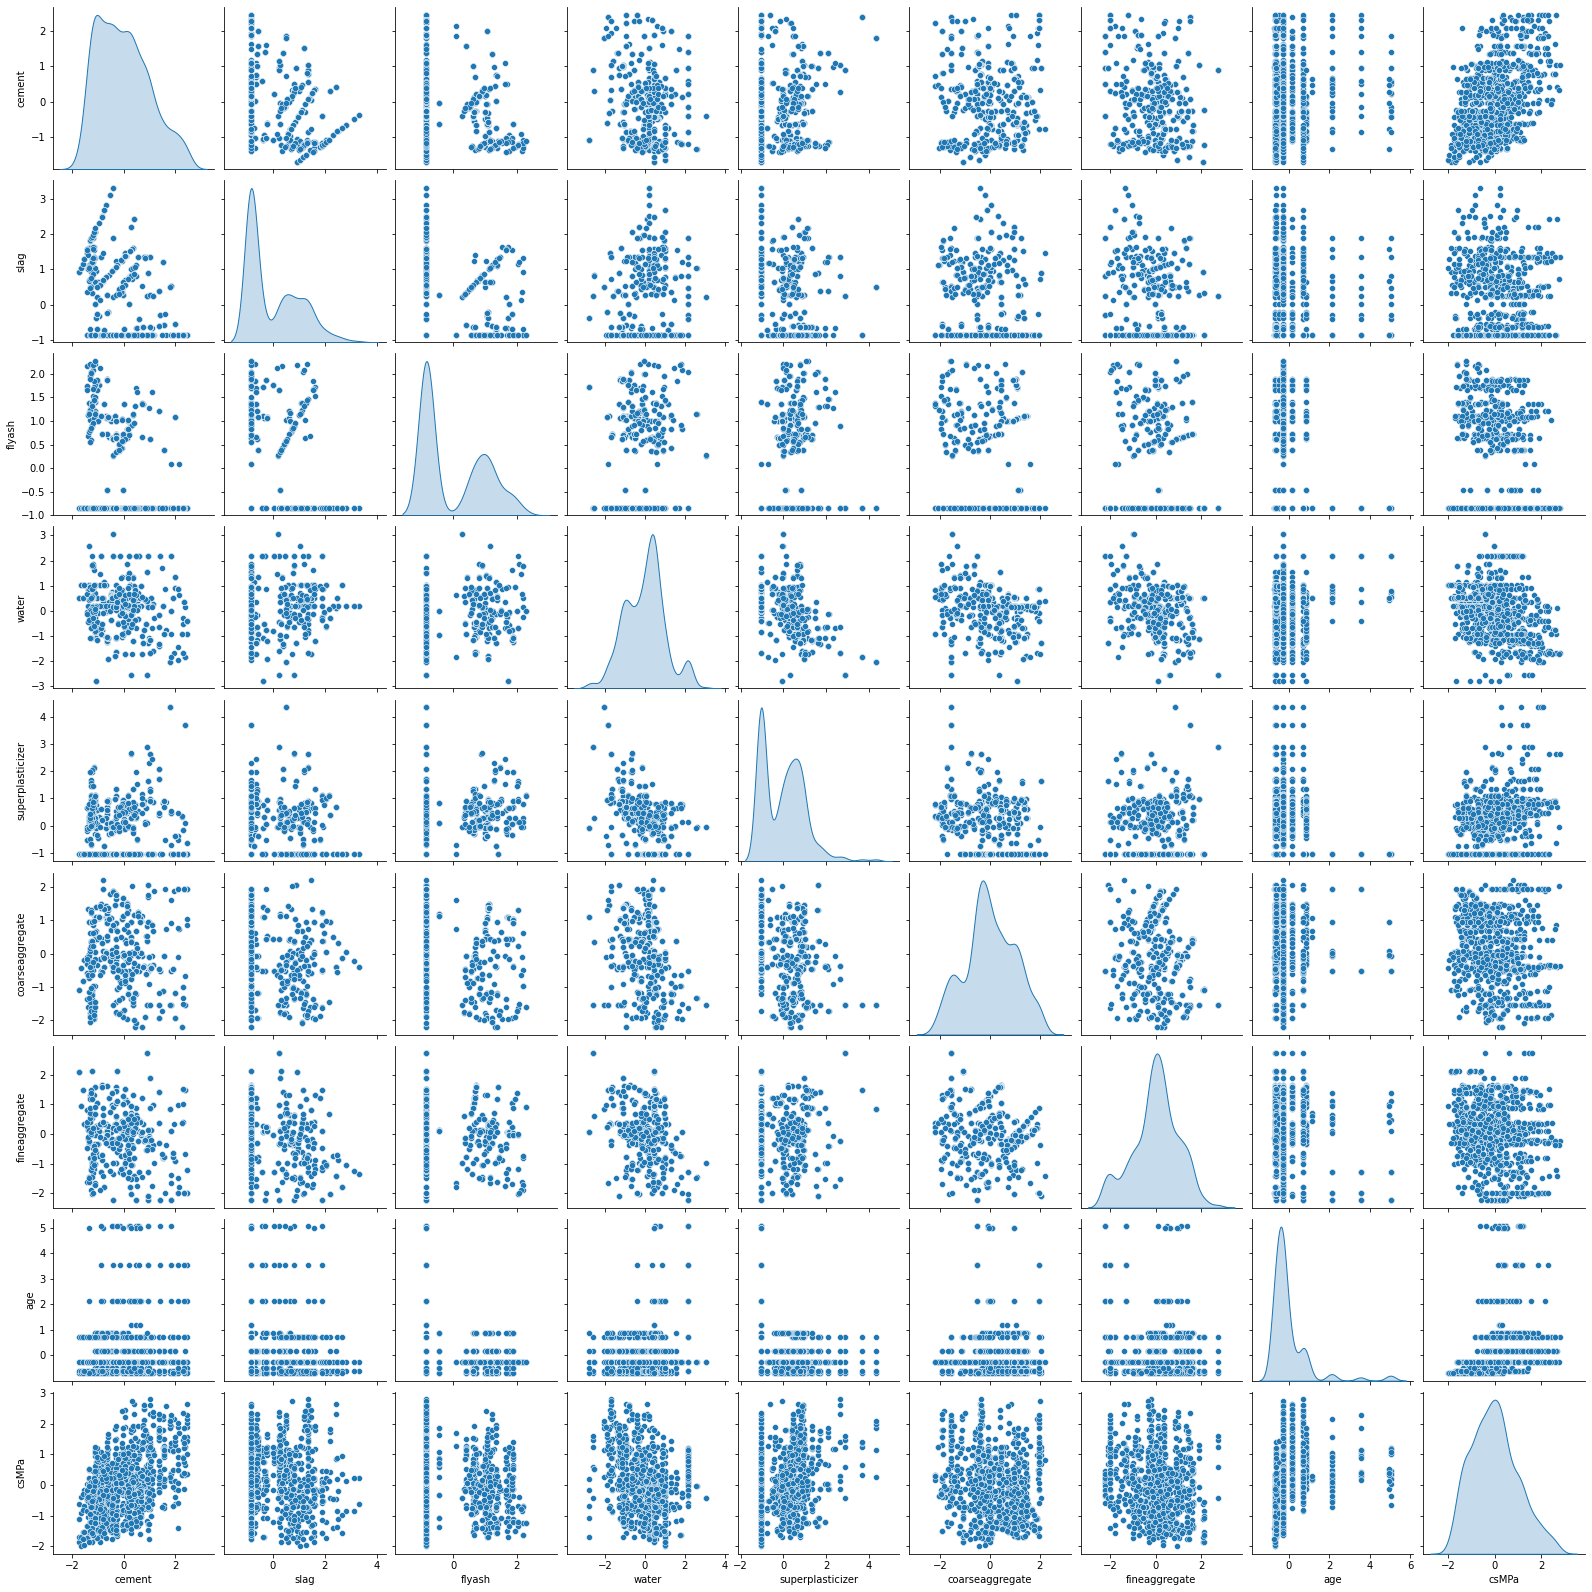

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaleddemo = pd.DataFrame(sc.fit_transform(demo))
scaleddemo.columns = demo.columns
sns.pairplot(scaleddemo,diag_kind='kde')

C:\Users\Sayan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


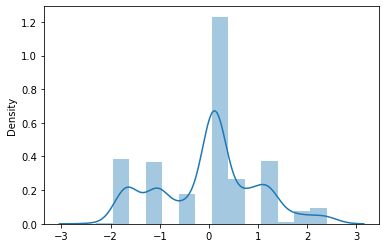

In [6]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedage = pt.fit_transform(demo[['age']])
#sns.distplot(demo['age'])
sns.distplot(transformedage)

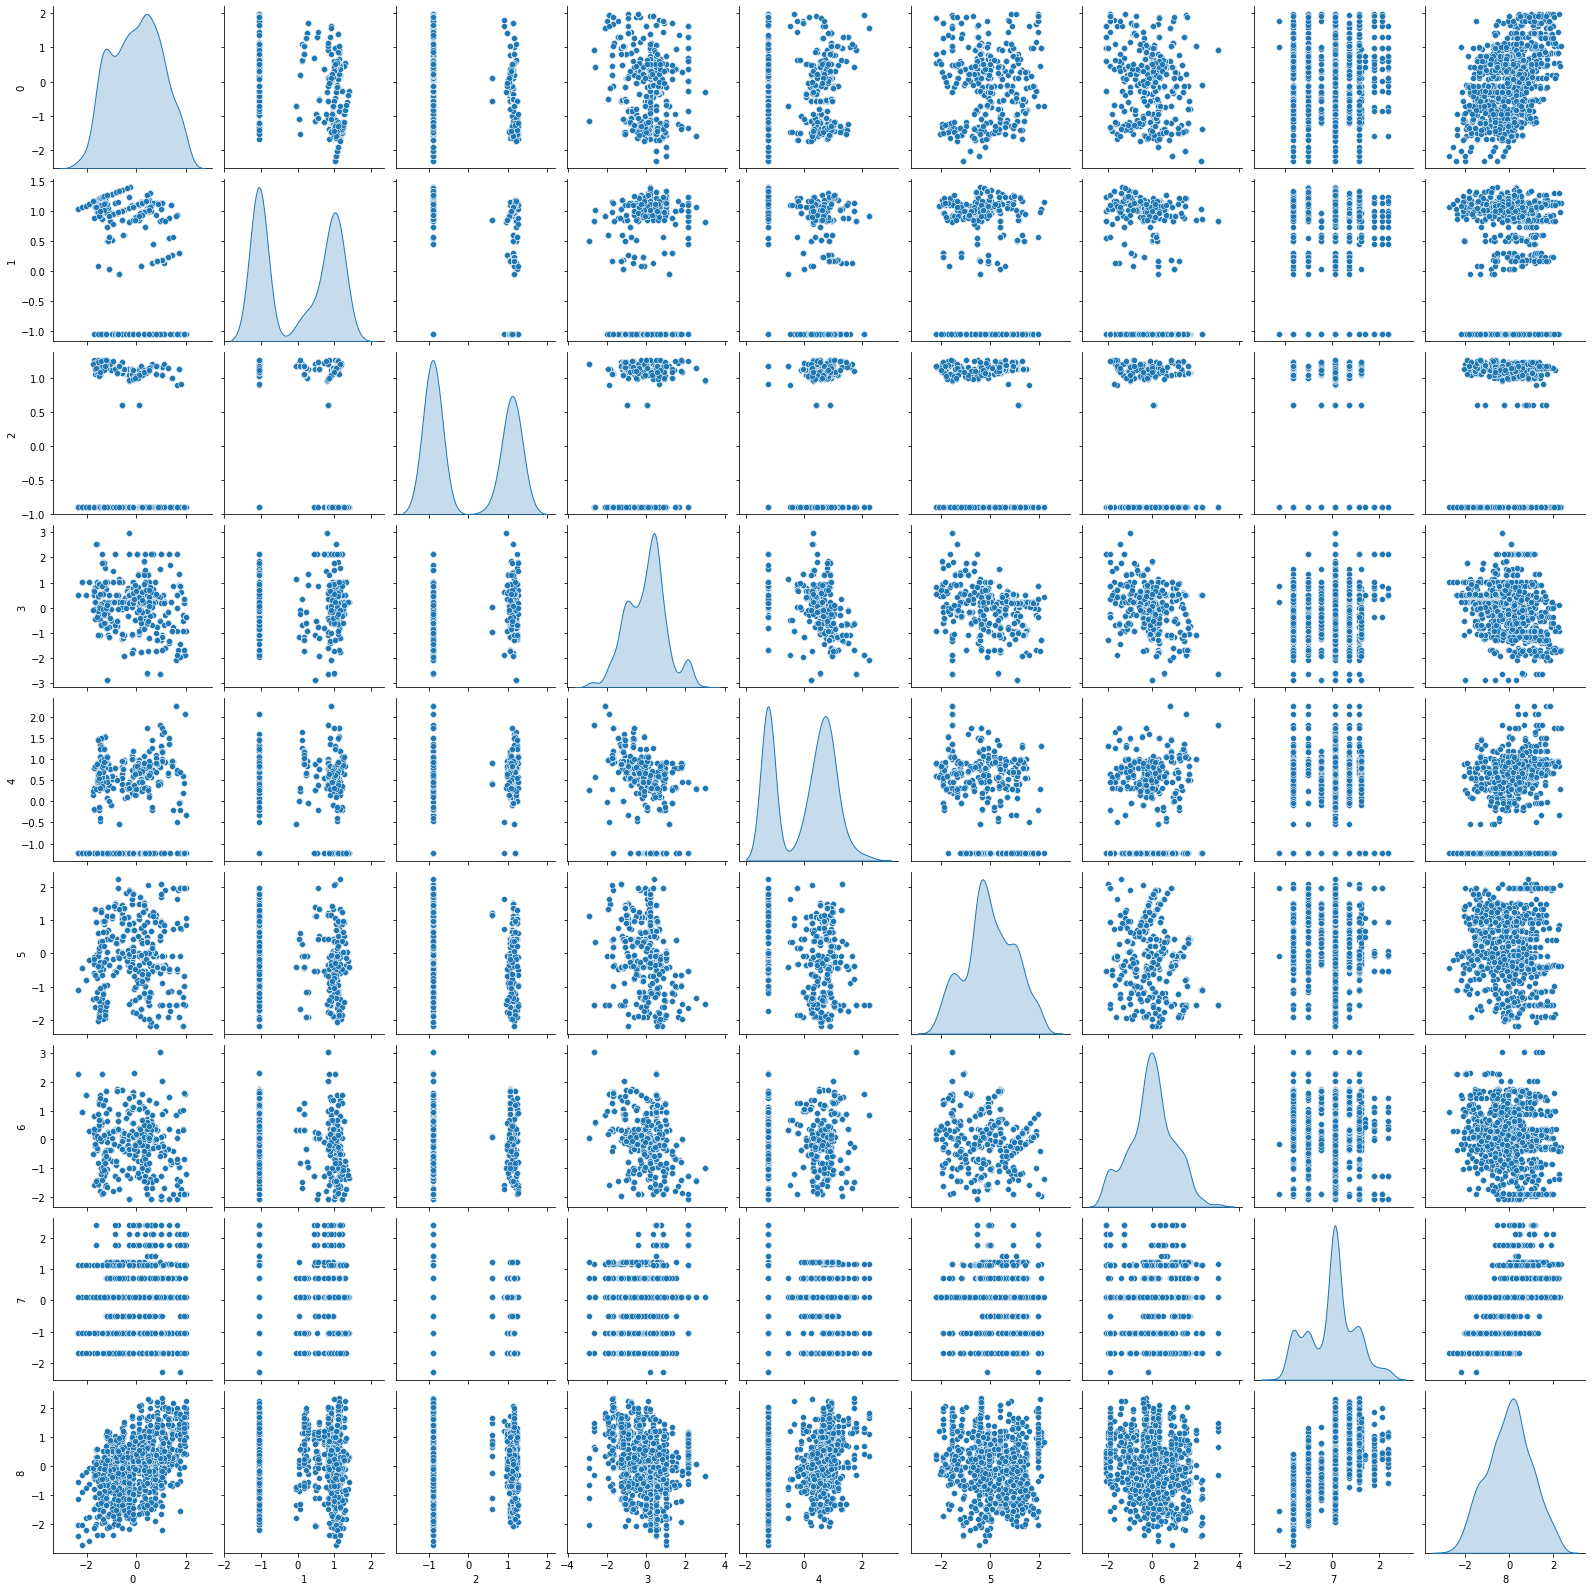

In [7]:
sns.pairplot(pd.DataFrame(pt.fit_transform(demo)),diag_kind='kde')

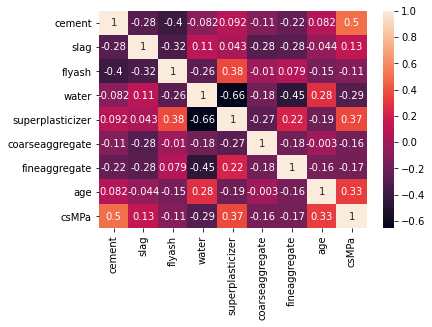

In [8]:
sns.heatmap(demo.corr(),annot=True)

In [9]:
import pandas as pd
from pandas_profiling import ProfileReport
design_report = ProfileReport(demo)
design_report.to_file(output_file='report.html')

In [10]:
import sweetviz as sv
sweet_report = sv.analyze(demo)
sweet_report.show_html('sweet_report.html')


Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (1030, 9)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  8
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
 

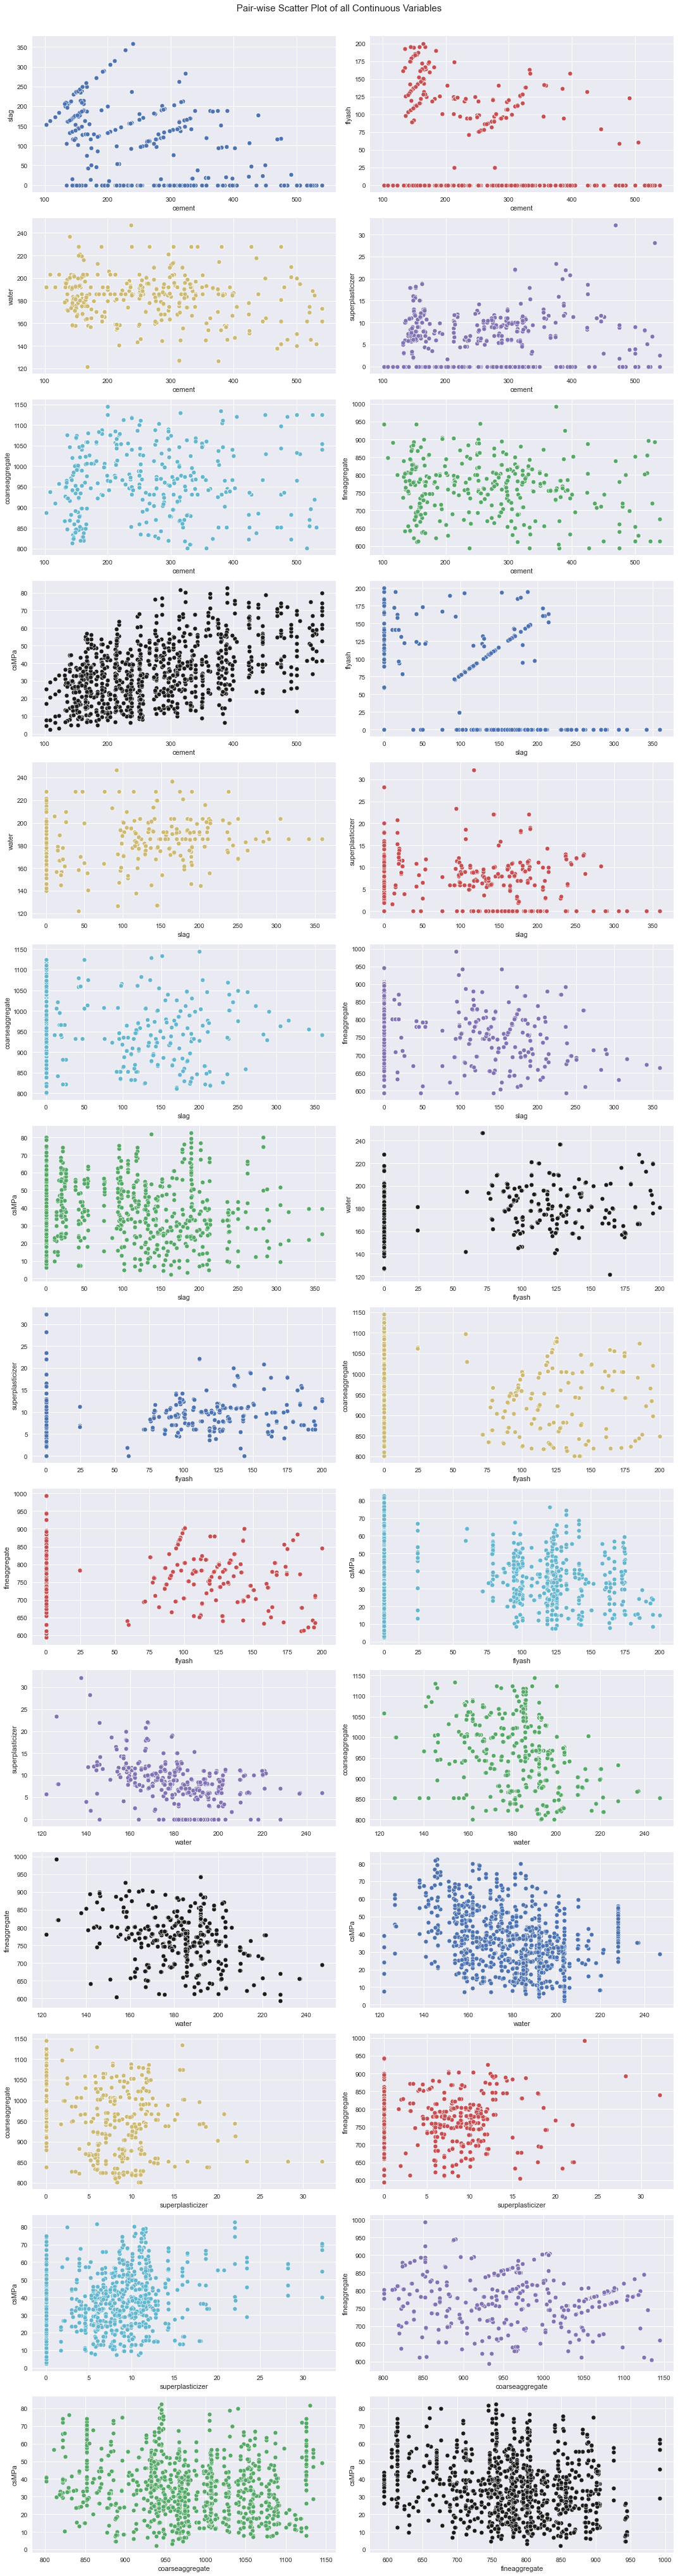

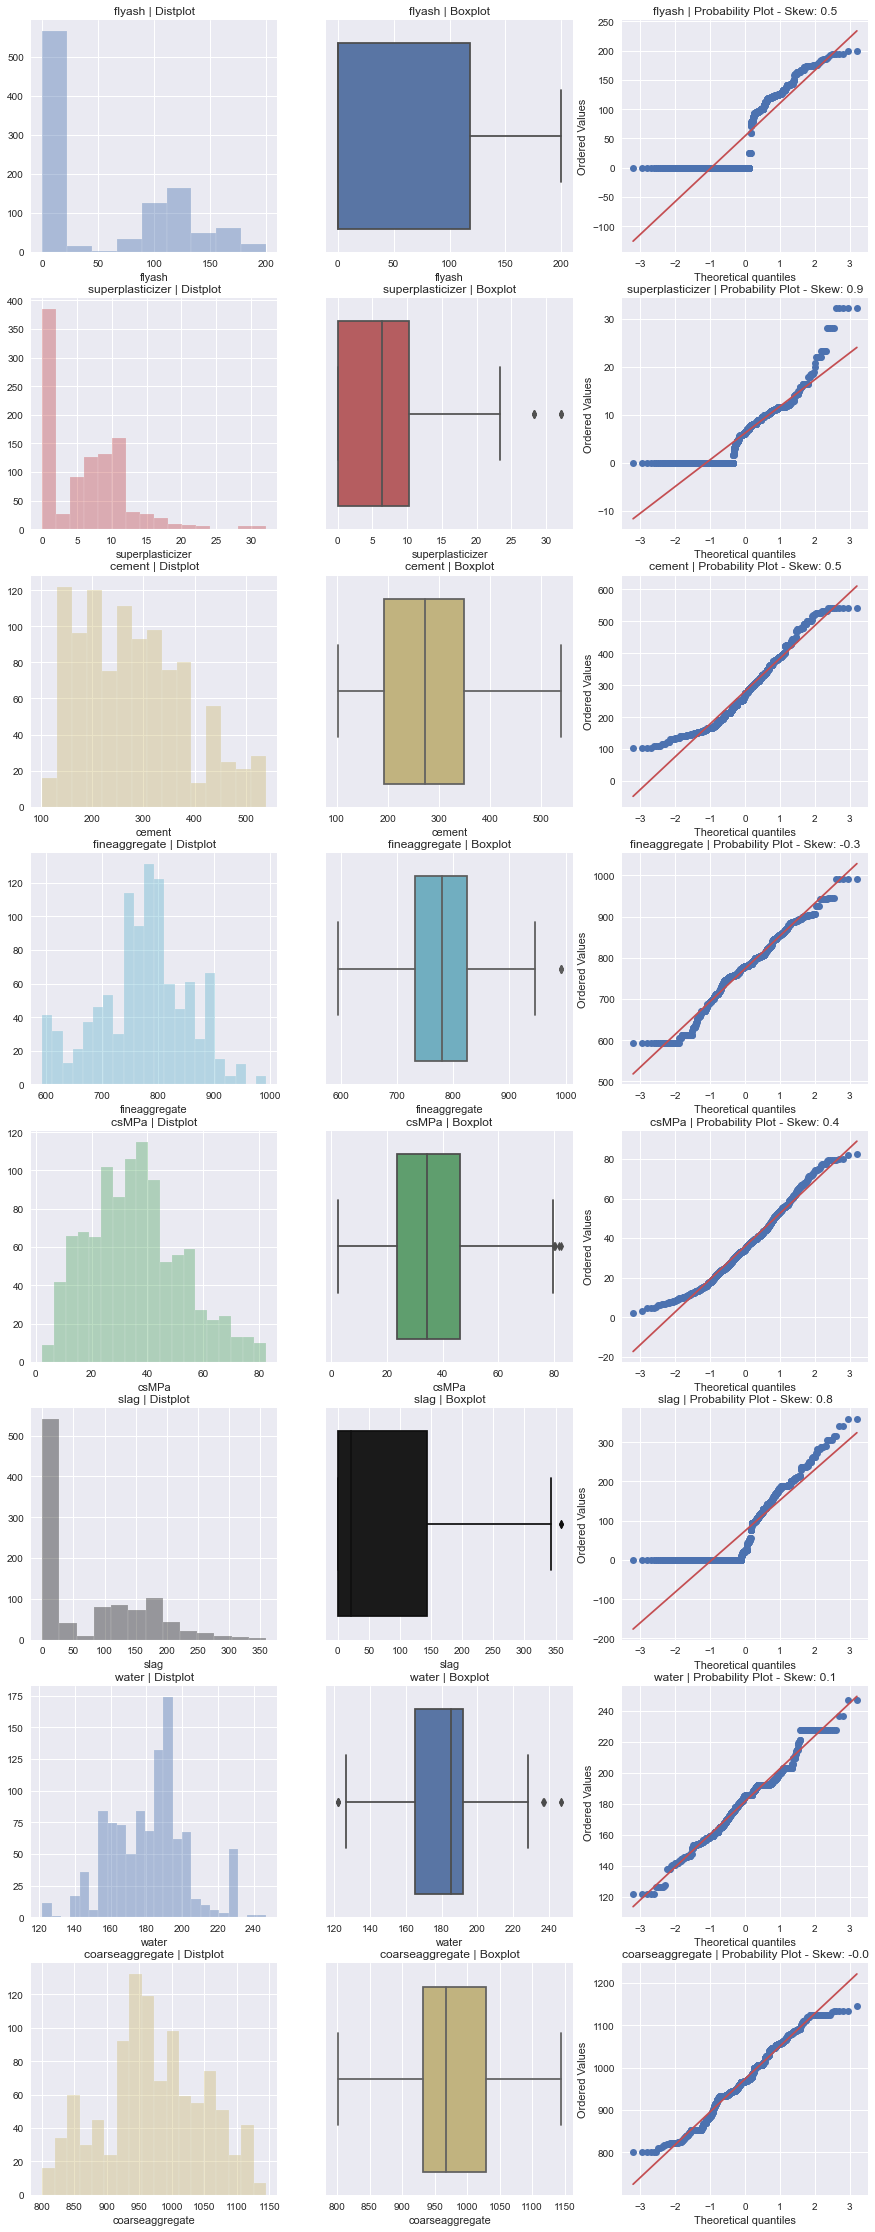

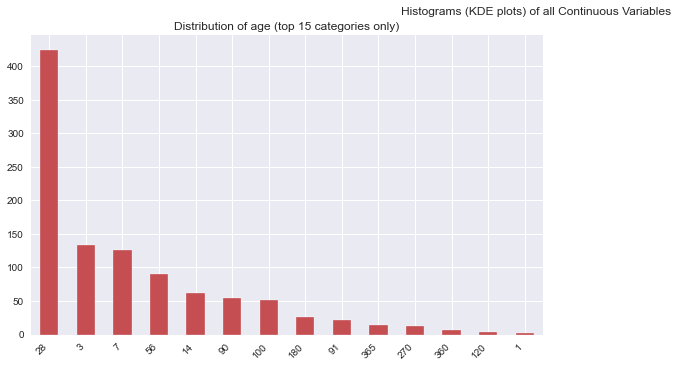

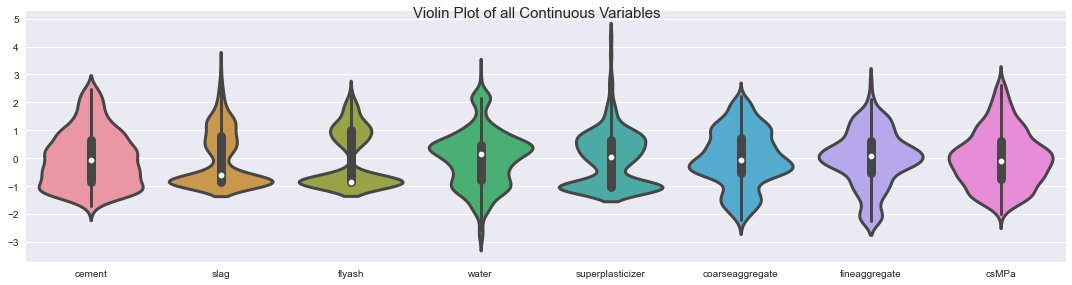

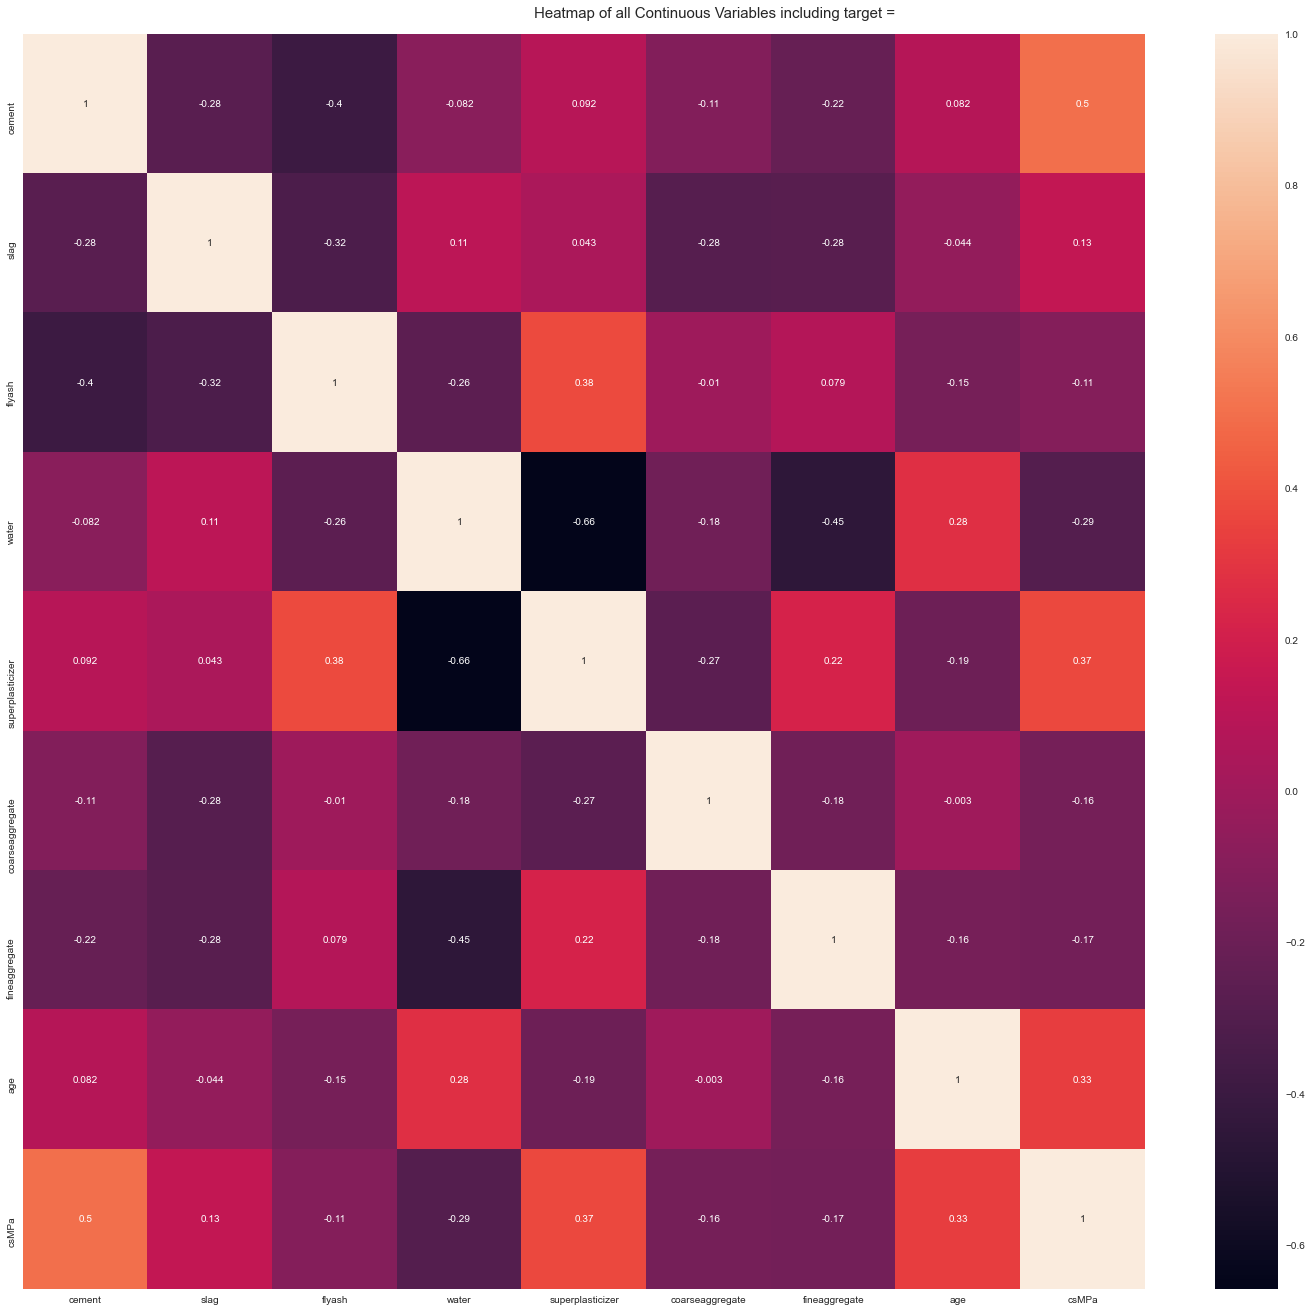

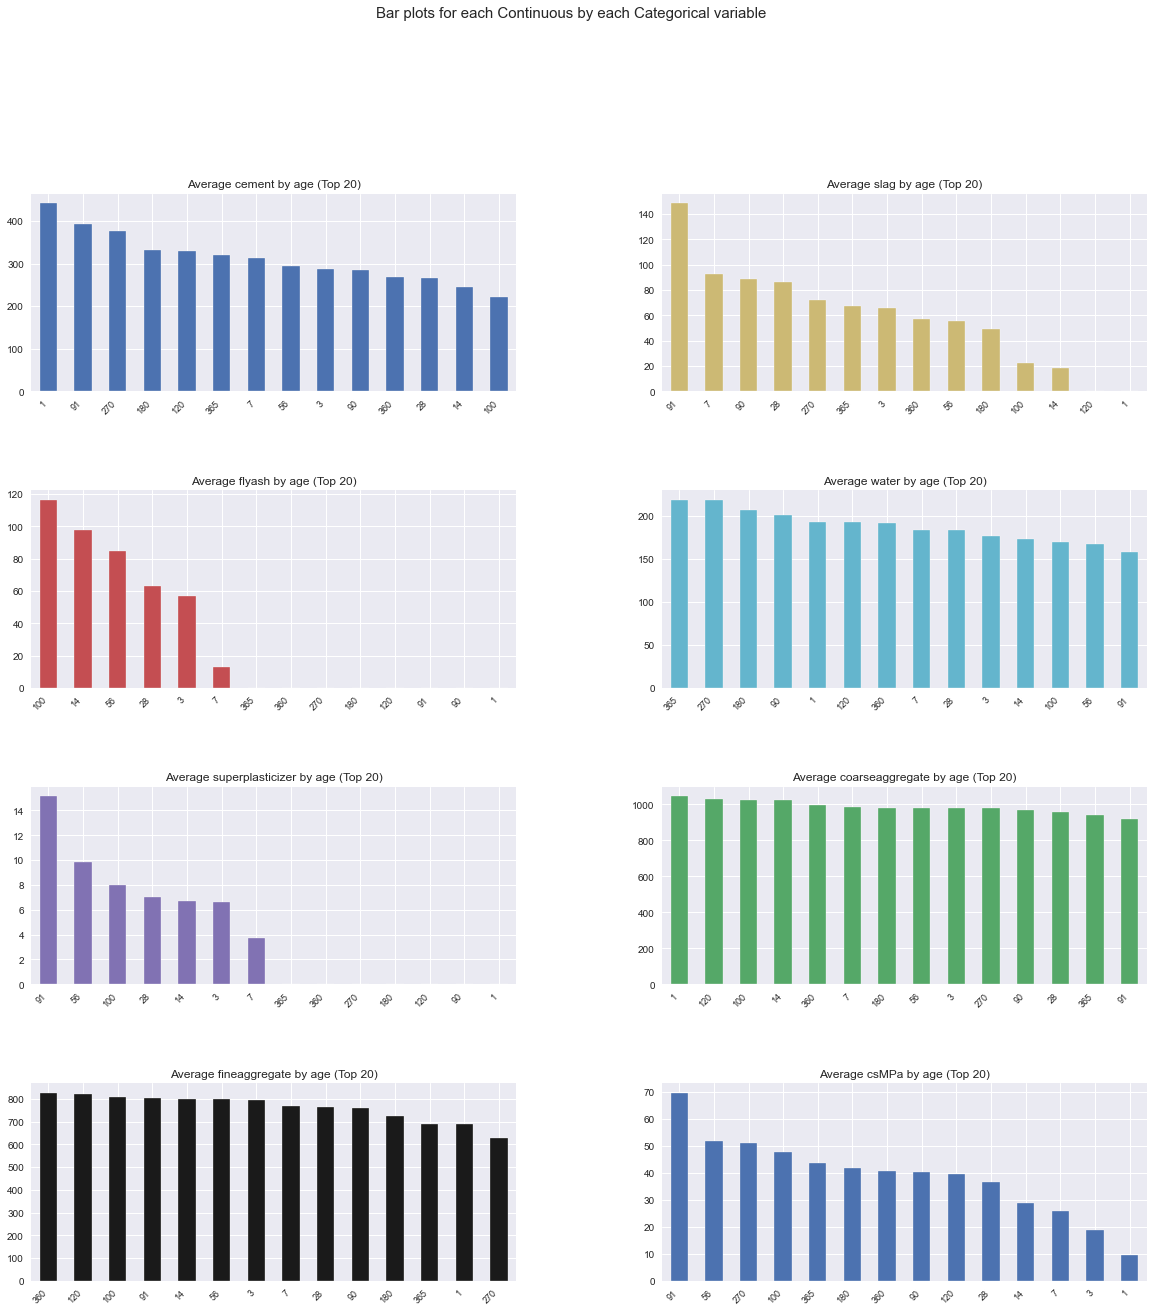

Time to run AutoViz (in seconds) = 19.668

 ###################### VISUALIZATION Completed ########################


In [11]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('Concrete_Data_Yeh.csv')

In [12]:
import dtale
import pandas as pd
d = dtale.show(demo)
d.open_browser()

In [13]:
#Basic Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
X=demo.drop('csMPa',axis=1)
#X=demo[['cement','age','water']]
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
lr = LinearRegression()
lr.fit(Xtrain,ytrain)
print("Training R2")
print(lr.score(Xtrain,ytrain))
print("Testing R2")
print(lr.score(Xtest,ytest))

Training R2
0.6210697467843866
Testing R2
0.5911879648718986


In [14]:
X.head()

cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  
0          676.0   28  
1          676.0   28  
2          594.0  270  
3          594.0  365  
4          825.5  360

In [15]:
lr.coef_

array([[ 0.12226049,  0.10551064,  0.09218552, -0.15212926,  0.25469802,
         0.02128236,  0.02197247,  0.11598932]])

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
sc=StandardScaler()
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
lr = LinearRegression()
lr.fit(scaledXtrain,ytrain)
print("Training R2")
print(lr.score(scaledXtrain,ytrain))
print("Testing R2")
print(lr.score(scaledXtest,ytest))

Training R2
0.6210697467843866
Testing R2
0.5911879648718985


In [17]:
lr.coef_

array([[12.88715568,  9.08366371,  5.95002136, -3.29482537,  1.54318323,
         1.65154057,  1.78122932,  7.35870478]])

In [18]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("sc",StandardScaler()),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.6210697467843866
Testing R2
0.5911879648718985
[0.71979944 0.55030814 0.62680426 0.35784287 0.60852661 0.64955735
 0.60723933 0.74942929 0.55857665 0.56769243]
Average R2
0.5995776369504167


In [19]:
pipe['lr'].coef_

array([[12.88715568,  9.08366371,  5.95002136, -3.29482537,  1.54318323,
         1.65154057,  1.78122932,  7.35870478]])

In [20]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("pt",PowerTransformer()),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.8080840977706969
Testing R2
0.7997646551542748
[0.82406782 0.82312497 0.77916128 0.67511077 0.78006356 0.76090952
 0.80278288 0.87637862 0.82497253 0.80589979]
Average R2
0.7952471755402373


In [21]:
#Will regularisation help ?
#With Pipeline
from sklearn.linear_model import Lasso,Ridge
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("pt",PowerTransformer()),
("lr", Lasso(alpha=5)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.400366594907996
Testing R2
0.4048550237350853
[0.42253404 0.38584176 0.36962928 0.34430595 0.33443445 0.3910601
 0.39201885 0.42375406 0.38099593 0.45247324]
Average R2
0.3897047644046731


In [22]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso,Ridge
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("pt", PowerTransformer()),
("poly",PolynomialFeatures(degree=3)),
("lr", LinearRegression())
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.9454472537007774
Testing R2
0.9248452602875391
[0.88776231 0.84465574 0.79916504 0.83417566 0.7707194  0.9203704
 0.40352515 0.95483383 0.65737425 0.57759422]
Average R2
0.765017600496333


In [23]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("pt",PowerTransformer()),
("poly",PolynomialFeatures(degree=3)),
("rfe",RFE(estimator=LinearRegression(),n_features_to_select=70)),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.929073628311914
Testing R2
0.9139744254138866
[0.8791217  0.8622758  0.87701059 0.81614708 0.89297175 0.92354062
 0.78626263 0.94093591 0.78263827 0.80604357]
Average R2
0.8566947906440097


In [24]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("pt",PowerTransformer()),
("poly",PolynomialFeatures(degree=3)),
("pca",PCA(n_components=100)),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print()
print(pipe['pca'].explained_variance_ratio_)

Training R2
0.9128453729076147
Testing R2
0.8957946012337242
[0.88741238 0.88291316 0.84874161 0.73180234 0.91053407 0.87251592
 0.91719754 0.92920603 0.85846955 0.82565572]
Average R2
0.8664448327136849

[2.15280592e-01 1.09183333e-01 1.01954231e-01 5.92864375e-02
 5.55839677e-02 4.16287563e-02 2.98326803e-02 2.49288126e-02
 2.28337896e-02 2.03360687e-02 1.81909377e-02 1.66681798e-02
 1.57906802e-02 1.53152999e-02 1.37357094e-02 1.26471511e-02
 1.17074910e-02 1.11183245e-02 9.87953078e-03 9.48813929e-03
 9.27406870e-03 8.72082068e-03 8.20359178e-03 7.59015177e-03
 6.90003720e-03 6.49984384e-03 6.05806962e-03 5.78582638e-03
 5.60743248e-03 5.52983791e-03 5.24804478e-03 5.07042081e-03
 4.76715671e-03 4.48506992e-03 4.23765717e-03 4.14396010e-03
 3.88270902e-03 3.70491702e-03 3.58224192e-03 3.34361343e-03
 3.30874147e-03 3.09712240e-03 3.04309560e-03 2.88541661e-03
 2.75966284e-03 2.54243489e-03 2.53132283e-03 2.47911380e-03
 2.33108193e-03 2.19089690e-03 2.11196836e-03 2.03325493e-03
 1

In [28]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeRegressor
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
#("pt",PowerTransformer()),
("lr", DecisionTreeRegressor(max_depth=20,random_state=10)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.9954771058602125
Testing R2
0.8873504651810675
[0.87270311 0.93541957 0.88945441 0.49956867 0.87014447 0.85022706
 0.79655319 0.90082183 0.82953237 0.84606649]
Average R2
0.8290491173392207


In [26]:
#With Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("lr", RandomForestRegressor(n_estimators=200,random_state=10)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.9845267622955424
Testing R2
0.9220530902702947
[0.9020328  0.9296384  0.91840761 0.73954917 0.91616853 0.89726903
 0.90132621 0.92512011 0.90951474 0.9039966 ]
Average R2
0.8943023205600831


In [39]:
#With Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
#("pt",PowerTransformer()),
("lr", GradientBoostingRegressor(n_estimators=4,random_state=10)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.37660399644529385
Testing R2
0.38466611225481506
[0.4070848  0.38006787 0.36907992 0.27504689 0.3453404  0.31893841
 0.3561802  0.36278678 0.35301198 0.35672688]
Average R2
0.3524264122093486


In [40]:
pipe['lr'].estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x27E5E640840)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x27E5E640840)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x27E5E640840)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x27E5E640840)]],
      dtype=object)

In [58]:
tree1 = pipe['lr'].estimators_[1][0]
print(tree1)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x27E5E640840)


In [59]:
from sklearn.tree import export_graphviz
export_graphviz(tree1,out_file = 'tree.dot',feature_names=Xtrain.columns)

In [60]:
!dot -Tpng tree.dot > tree.png # to convert the tree in a png image

Error: dot: can't open #
Error: dot: can't open to
Error: dot: can't open convert
Error: dot: can't open the
Error: dot: can't open tree
Error: dot: can't open in
Error: dot: can't open a
Error: dot: can't open png
Error: dot: can't open image


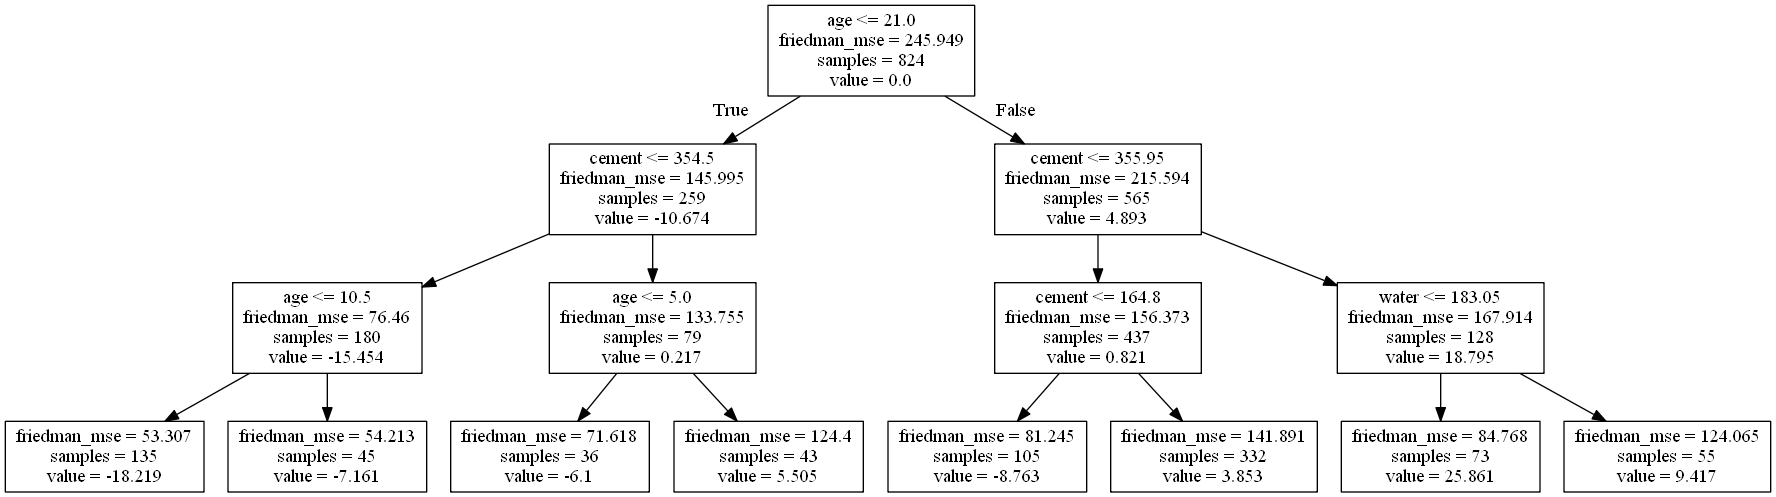

In [61]:
from IPython.display import Image
Image(filename='tree.png') 

In [63]:
#With Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
#("pt",PowerTransformer()),
("lr", AdaBoostRegressor(n_estimators=10,base_estimator=LinearRegression(),random_state=10)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.6142957558574607
Testing R2
0.5869666439743113
[0.71313474 0.56300258 0.6046258  0.38858946 0.61876149 0.64043809
 0.61862094 0.72828601 0.55533087 0.5825105 ]
Average R2
0.6013300480615988


Automatically created module for IPython interactive environment


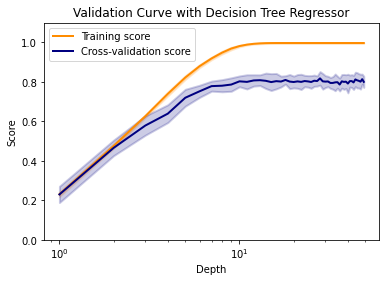

In [51]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(), Xtrain, ytrain, param_name="max_depth", param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Regressor")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Automatically created module for IPython interactive environment


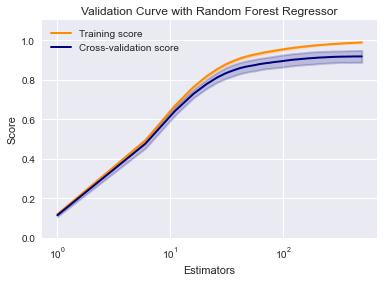

In [33]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
param_range = np.arange(1,500,5)
train_scores, test_scores = validation_curve(
    GradientBoostingRegressor(), Xtrain, ytrain, param_name="n_estimators", param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Gradient Boosting Regressor")
plt.xlabel("Estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [70]:
#Hyperparameter Tuning with Pipeline
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
pipe = Pipeline((
("pt",PowerTransformer()),
("poly",PolynomialFeatures()),
("rfe",RFE(estimator=LinearRegression())),
("lr", LinearRegression()),
))
param_grid = {
    'poly__degree' : [1,2,3],
    'rfe__n_features_to_select' : [10,20,30,40,50,60,70,80,90,100]
}
search = GridSearchCV(pipe,param_grid,cv=5)
search.fit(Xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=(('pt', PowerTransformer()),
                                       ('poly', PolynomialFeatures()),
                                       ('rfe',
                                        RFE(estimator=LinearRegression())),
                                       ('lr', LinearRegression()))),
             param_grid={'poly__degree': [1, 2, 3],
                         'rfe__n_features_to_select': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100]})

In [71]:
search.best_params_

{'poly__degree': 2, 'rfe__n_features_to_select': 50}

In [72]:
#Performance on the CV set
search.best_score_

0.8613965128762686

In [73]:
#Performance on the test set
search.score(Xtest,ytest)

0.8693185642957081

In [75]:
search.cv_results_

{'mean_fit_time': array([0.02912769, 0.0245533 , 0.03274765, 0.02935433, 0.02304111,
        0.02901063, 0.03297901, 0.03337545, 0.04610639, 0.03128219,
        0.0730267 , 0.06309309, 0.05221815, 0.03081393, 0.03979473,
        0.03735862, 0.02482791, 0.02580738, 0.03803167, 0.03500018,
        0.5265492 , 0.5425559 , 0.4781322 , 0.4909399 , 0.63358698,
        0.56907072, 0.43648233, 0.40564003, 0.40441236, 0.40242906]),
 'std_fit_time': array([0.00426181, 0.00286834, 0.00323812, 0.00777878, 0.00219638,
        0.00641571, 0.00473929, 0.00660679, 0.00545866, 0.00251413,
        0.01023606, 0.00634208, 0.00884402, 0.00226992, 0.00873202,
        0.00338882, 0.00326672, 0.00439331, 0.00524374, 0.00589772,
        0.09532761, 0.0807928 , 0.02322797, 0.02967078, 0.05036027,
        0.08405812, 0.03453526, 0.04113127, 0.04447265, 0.0711669 ]),
 'mean_score_time': array([0.00413389, 0.00308623, 0.00541291, 0.00338774, 0.00309529,
        0.00401368, 0.0043808 , 0.00458703, 0.00827332, 0.00

In [25]:
#With Pipeline (Transformation Pipeline Only, model separate)
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pipe = Pipeline((
("sc",StandardScaler()),
("poly",PolynomialFeatures(degree=1)),
("pt",PowerTransformer()),
("pca",PCA())
))
preparedtrain = pipe.fit_transform(Xtrain)
preparedtest = pipe.transform(Xtest)
lr=LinearRegression()
scoresdt = cross_val_score(lr,preparedtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print("SD of accuracy")
print(np.std(scoresdt))
print("Coefficient of Variation")
print(np.std(scoresdt)/np.mean(scoresdt))

[0.77365024 0.78099561 0.80337823 0.75390135 0.85986501 0.83368849
 0.83501914 0.80908602 0.80253152 0.79254915]
Average R2
0.8044664755937301
SD of accuracy
0.03013641366594298
Coefficient of Variation
0.03746136673215753


C:\Users\Sayan\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [26]:
#With Pipeline (Transformation Pipeline Only, model separate)
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
pipe = Pipeline((
("sc",StandardScaler()),
("poly",PolynomialFeatures(degree=1)),
("pt",PowerTransformer()),
("pca",PCA())
))
preparedtrain = pipe.fit_transform(Xtrain)
preparedtest = pipe.transform(Xtest)
lr=DecisionTreeRegressor()
scoresdt = cross_val_score(lr,preparedtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print("SD of accuracy")
print(np.std(scoresdt))
print("Coefficient of Variation")
print(np.std(scoresdt)/np.mean(scoresdt))

[0.68330844 0.70704488 0.85494978 0.58984301 0.80400126 0.80996773
 0.75179771 0.77941225 0.75391804 0.69158226]
Average R2
0.7425825362056282
SD of accuracy
0.07294929660998851
Coefficient of Variation
0.09823729087777545


C:\Users\Sayan\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [18]:
import warnings
warnings.filterwarnings('ignore')
#With Pipeline (Transformation Pipeline Only, model separate)
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
pipe = Pipeline((
("sc",StandardScaler()),
("poly",PolynomialFeatures(degree=1)),
("pt",PowerTransformer()),
("pca",PCA())
))
preparedtrain = pipe.fit_transform(Xtrain)
preparedtest = pipe.transform(Xtest)
lr=GradientBoostingRegressor(n_estimators=1500)
scoresdt = cross_val_score(lr,preparedtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print("SD of accuracy")
print(np.std(scoresdt))
print("Coefficient of Variation")
print(np.std(scoresdt)/np.mean(scoresdt))

[0.86861374 0.89772305 0.93367235 0.84001535 0.91282612 0.89964578
 0.921792   0.92051679 0.88627161 0.87960081]
Average R2
0.8960677606449095
SD of accuracy
0.026893683857073775
Coefficient of Variation
0.030013002407003355


In [19]:
#Hyperparameter Tuning with Pipeline
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
pipe = Pipeline((
("sc",StandardScaler()),
("poly",PolynomialFeatures()),
("pt",PowerTransformer()),
("pca",PCA()),
("xb",GradientBoostingRegressor())
))
param_grid = {
    'poly__degree' : [2,3],
    'pca__n_components' : [30,40],
    'xb__n_estimators' : [10,20,30,40,50]
}
search = GridSearchCV(pipe,param_grid,cv=5)
search.fit(Xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=(('sc', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('pt', PowerTransformer()),
                                       ('pca', PCA()),
                                       ('xb', GradientBoostingRegressor()))),
             param_grid={'pca__n_components': [30, 40], 'poly__degree': [2, 3],
                         'xb__n_estimators': [10, 20, 30, 40, 50]})

In [20]:
search.best_params_

{'pca__n_components': 30, 'poly__degree': 2, 'xb__n_estimators': 50}

In [21]:
#Performance on the CV set
search.best_score_

0.7839162400457855

In [22]:
#Performance on the test set
search.score(Xtest,ytest)

0.7512943788514964

In [23]:
search.cv_results_

{'mean_fit_time': array([0.19096241, 0.23326526, 0.29194255, 0.36161704, 0.3772058 ,
        0.44930754, 0.51126919, 0.55314813, 0.60268068, 0.62530851,
        0.21797576, 0.27168489, 0.33744488, 0.38683052, 0.44160566,
        0.46298795, 0.54260454, 0.6051167 , 0.64258132, 0.70217381]),
 'std_fit_time': array([0.01977034, 0.03172169, 0.0144781 , 0.02762579, 0.01761062,
        0.0189252 , 0.02721113, 0.02039415, 0.03154639, 0.01267028,
        0.03522738, 0.03030187, 0.02506706, 0.02545423, 0.02951777,
        0.01758511, 0.00703823, 0.02472447, 0.0121282 , 0.01551998]),
 'mean_score_time': array([0.00817785, 0.00678358, 0.00848937, 0.00620499, 0.00610118,
        0.01736364, 0.01526794, 0.01751823, 0.01197186, 0.01138163,
        0.00997777, 0.00738616, 0.00668197, 0.00527825, 0.00590253,
        0.01695728, 0.01372294, 0.01255779, 0.01203427, 0.01151824]),
 'std_score_time': array([0.00171583, 0.00146544, 0.00115987, 0.00083934, 0.00067351,
        0.00358862, 0.00255275, 0.003081

In [24]:
#Confidence Interval Of the Accuracy
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
#With Pipeline (Transformation Pipeline Only, model separate)
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pipe = Pipeline((
("sc",StandardScaler()),
("poly",PolynomialFeatures(degree=1)),
("pt",PowerTransformer()),
("pca",PCA()),
("lr", GradientBoostingRegressor())
))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print("SD of accuracy")
print(np.std(scoresdt))
#Confidence Interval
xbar = np.mean(scoresdt)
n=10
s=np.std(scoresdt,ddof=1)
se=s/np.sqrt(n)
stats.t.interval(0.95,df=9,loc=xbar,scale=se)

[0.8370562  0.88425871 0.90936244 0.84781201 0.89176156 0.88844048
 0.87243057 0.82535118 0.86053001 0.85529928]
Average R2
0.8672302448488365
SD of accuracy
0.025243673981267152


(0.8481951922119625, 0.8862652974857105)

In [68]:
import warnings
warnings.filterwarnings('ignore')
#Model Comparison
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import model_selection
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
lr = LinearRegression()
dt = DecisionTreeRegressor()
xb = GradientBoostingRegressor(n_estimators=1000)
models = []
models.append(('Linear Regression',lr))
models.append(('Decision Tree Regression',dt))
models.append(('Gradient Boosted Regression',xb))

Linear Regression: 0.607883 (0.101906)
Decision Tree Regression: 0.858334 (0.107083)
Gradient Boosted Regression: 0.933950 (0.046984)


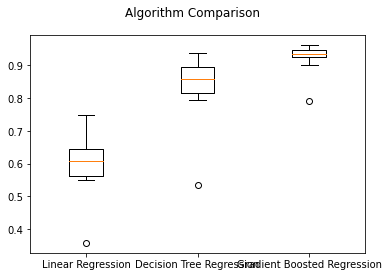

In [69]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=10)
	cv_results = model_selection.cross_val_score(model, Xtrain, ytrain, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [70]:
results

[array([0.71979944, 0.55030814, 0.62680426, 0.35784287, 0.60852661,
        0.64955735, 0.60723933, 0.74942929, 0.55857665, 0.56769243]),
 array([0.87165248, 0.93876988, 0.90030568, 0.53608372, 0.87842364,
        0.84501554, 0.79418919, 0.90459671, 0.8109103 , 0.83235681]),
 array([0.93189515, 0.94710592, 0.93600463, 0.79013353, 0.93048597,
        0.94829156, 0.95257757, 0.96176615, 0.92229134, 0.90004861])]

In [81]:
print(np.median(results[2]))
print(np.std(results[2]))

0.9339498905167669
0.046983635975804065


<AxesSubplot:>

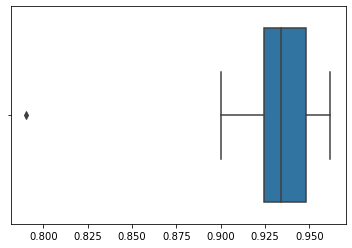

In [75]:
sns.boxplot(results[2])